In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [9]:
# set this to the directory where you have the data
data_dir = "/Users/lshahsha/Documents/GitHub/Carney_ws/data"
# set this to the task name you want to look at
task_name = "random"


# exploring the the data

In [4]:

# load the data for the task
task_file = f"{data_dir}/{task_name}.csv"
df = pd.read_csv(task_file, sep=",")
# get how many subjects we have
print(f"number of subjects for {task_name} task: {len(df.subj_id.unique())}")
# get a list of subjects
subj_list = df.subj_id.unique()


number of subjects for random task: 315


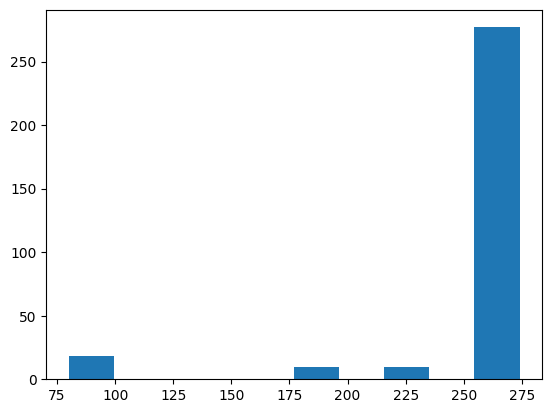

In [5]:
# get how many trials each subject has for this task
n_trials = []
for subj in subj_list:
    df1 = df.loc[df.subj_id == subj]
    n_trials.append(len(df1))

# plot the number of trials
_ = plt.hist(n_trials)

In [6]:
# now get the variables (recorded as columns)
print(f"columns in the data: {df.columns}")

columns in the data: Index(['Unnamed: 0', 'subj_id', 'prolific_pid', 'block', 'trial_index',
       'file_path', 'task_1', 'cue_1_start', 'cue_1_dur', 'cue_1_end',
       'task_2', 'cue_2_start', 'cue_2_dur', 'cue_2_end', 'go_1_start',
       'go_1_dur', 'go_1_end', 'go_2_start', 'go_2_dur', 'go_2_end',
       'mov_1_coherence', 'mov_1_start', 'mov_1_dur', 'mov_1_end',
       'mov_2_coherence', 'mov_2_start', 'mov_2_dur', 'mov_2_end',
       'or_1_coherence', 'or_1_start', 'or_1_dur', 'or_1_end',
       'or_2_coherence', 'or_2_start', 'or_2_dur', 'or_2_end', 'trial_start',
       'trial_end', 'key_presses'],
      dtype='object')


In [7]:
# key presses column contains data for the time of key presses, what key was pressed and whether it was correct
# this column contains a list containing a dictionary for each key press
# keys of this dictionary are 'correct', 'key', 'time'
# we now get those values in separate columns

# first step is to get the dictionary out of the list
# the list is stored as a string, so we need to convert it to a list first
keyp_col = df['key_presses'].apply(lambda x: eval(x))

# now we can get the values of the dictionary
# if the list is empty, we will get None
keyp_col = keyp_col.apply(lambda x: x[0] if len(x) > 0 else None)

# now we can get the values of the dictionary
# first we get the 'correct'! if the dictionary is None, we will set it to False
df['correct'] = keyp_col.apply(lambda x: x['correct'] if x is not None else False)

# now we get the key pressed
# if the dictionary is None, we will set it to None
df['key'] = keyp_col.apply(lambda x: x['key'] if x is not None else None)

# now we get the time of the key press
# if the dictionary is None, we will set it to None
df['keyp_time'] = keyp_col.apply(lambda x: x['time'] if x is not None else None)
# df
